<font face="Arial" size="4" color="black">
    
# Multipartite Entangled States Preparation Theory, with QuTiP examples
Author: Anastasiya Khromova (anastasiya.khromova17@gmail.com), 2025

## The GHZ States

The GHZ state is generally considered to have genuine three-partite entanglement. In contrast, the W state has the interesting property of having the maximal expected amount of two-partite entanglement if one party is traced out. The procedure to prepare the three-qubit GHZ entangled state is the following: 
1. Create a 3-qubit quantum circuit: qc = QubitCircuit(N=3, num_cbits=3)
2. Apply a Hadamard gate (H) to the first qubit: qc.add_gate("H", 0)
3. Apply a CNOT gate between the first and second qubits (control on the first qubit):qc.add_gate("CNOT", 1, 0)
4. Apply a CNOT gate between the second and third qubits (control on the second qubit): qc.add_gate("CNOT", 2, 1)
5. Add measurements to the circuit:
</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import * #Qutip is a Python library for simulating quantum systems.
from qutip_qip.circuit import QubitCircuit
from qutip_qip.operations import *  # Import gate operations
from qutip import tensor
from qutip.measurement import measure, measurement_statistics

Quantum object: dims=[[2, 2, 2], [1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
GHZ State: Quantum object: dims=[[2, 2, 2], [1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.70710678]]


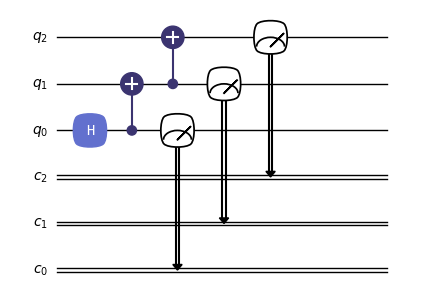

In [2]:
# Create a 3-qubit quantum circuit
qc = QubitCircuit(N=3, num_cbits=3)

# Add gates to create the GHZ state
qc.add_gate("H", 0)
qc.add_gate("CNOT", 1, 0)
qc.add_gate("CNOT", 2, 1)

# Initial state: all qubits in |0⟩ state
initial_state = tensor([basis(2, 0) for _ in range(qc.N)])
print(initial_state)


# Simulate the circuit
result = qc.run(state=initial_state)

# Get the final state
GHZ_state = result

print("GHZ State:", GHZ_state)



# Add measurements to the circuit
qc.add_measurement("M", targets=[0], classical_store=0)
qc.add_measurement("M", targets=[1], classical_store=1)
qc.add_measurement("M", targets=[2], classical_store=2)

# Draw the circuit
fig, ax = plt.subplots(figsize=(6, 3))
qc.draw("matplotlib", ax=ax)
#fig.savefig('GHZ_state_circuit.png', dpi=300, bbox_inches='tight')

Measurement outcome probabilities:
|000>: 0.4760
|001>: 0.0000
|010>: 0.0000
|011>: 0.0000
|100>: 0.0000
|101>: 0.0000
|110>: 0.0000
|111>: 0.5240


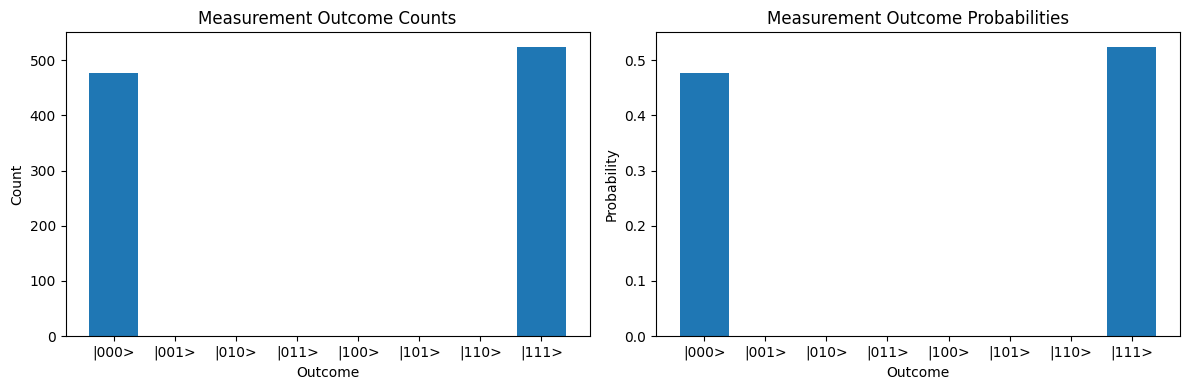

In [3]:
# Define the projection operators for the computational basis
PZ1 = [tensor(ket2dm(basis(2, 0)), identity(2), identity(2)), tensor(ket2dm(basis(2, 1)), identity(2), identity(2))]
PZ2 = [tensor(identity(2), ket2dm(basis(2, 0)), identity(2)), tensor(identity(2), ket2dm(basis(2, 1)), identity(2))]
PZ3 = [tensor(identity(2), identity(2), ket2dm(basis(2, 0))), tensor(identity(2), identity(2), ket2dm(basis(2, 1)))]

# Run the circuit multiple times and collect the measurement outcomes
num_runs = 1000
measurement_results = []

for _ in range(num_runs):
    # Run the circuit
    result = qc.run(initial_state)
    
    # Measure the first qubit
    measurement1, _ = measure(result, PZ1)
    
    # Measure the second qubit
    measurement2, _ = measure(result, PZ2)

    # Measure the third qubit
    measurement3, _ = measure(result, PZ3)
    
    # Combine the measurement outcomes
    outcome = f"|{measurement1}{measurement2}{measurement3}>"
    measurement_results.append(outcome)


# Count the occurrences of |000>, |001>, |010>, |011>, |100>, |101>, |110>, and |111> outcomes
outcome_counts = {'|000>': 0, '|001>': 0, '|010>': 0, '|011>': 0, '|100>': 0, '|101>': 0, '|110>': 0, '|111>': 0}
for outcome in measurement_results:
    outcome_counts[outcome] += 1

# Calculate the probabilities of each outcome
total_runs = len(measurement_results)
probabilities = {outcome: count / total_runs for outcome, count in outcome_counts.items()}

# Print the probabilities
print("Measurement outcome probabilities:")
for outcome, probability in probabilities.items():
    print(f"{outcome}: {probability:.4f}")
# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the count histogram
ax1.bar(outcome_counts.keys(), outcome_counts.values())
ax1.set_xlabel('Outcome')
ax1.set_ylabel('Count')
ax1.set_title('Measurement Outcome Counts')

# Plot the probability histogram
ax2.bar(outcome_counts.keys(), probabilities.values())
ax2.set_xlabel('Outcome')
ax2.set_ylabel('Probability')
ax2.set_title('Measurement Outcome Probabilities')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure as PNG
plt.savefig('GHZ_state_histograms.png', dpi=300)

# Display the plot
plt.show()


<font face="Arial" size="4" color="black">

The GHZ state exhibits genuine three-partite entanglement, meaning that all three qubits are entangled with each other and the entanglement cannot be reduced to pairwise entanglement between any two qubits.

In the GHZ state, only the |000⟩ and |111⟩ outcomes have non-zero probabilities, while all other outcomes have zero probability. The probabilities of the |000⟩ and |111⟩ outcomes should be equal and sum up to 1. In this case, the probabilities are close to 0.5 each, which is consistent with the ideal GHZ state.

## The W States

The three-qubit W entangled state is, in a certain sense, "less entangled" than the GHZ state; however, that entanglement is, in a sense, more robust against single-particle measurements, in that, for an N-qubit W state, an entangled (N-1)-qubit state remains after a single-particle measurement. By contrast, certain measurements on the GHZ state collapse it into a mixture or a pure state. The W-entangled state is named after Wolfgang Dür, who first reported the state with Guifré Vidal and Ignacio Cirac in 2000.

> So, how do we create the three-qubit W-entangled state? It is trickier.

The three-qubit W state and the GHZ state exhibit different types of entanglement and have distinct properties.
The angle theta = 2 * np.arccos(1/np.sqrt(3)) is the angle to use for the rotation gate Ry(theta) when creating the W-state. The reason for this specific angle is that it ensures the correct amplitudes of the basis states in the W-state. The W-state is an equal superposition of the three basis states |001⟩, |010⟩, and |100⟩, with each state having an amplitude of 1/sqrt(3).
By applying the rotation gate Ry(theta) with theta = 2 * np.arccos(1/np.sqrt(3)) to the first qubit, we create a superposition state between |0⟩ and |1⟩ with the desired amplitudes. This sets the stage for creating the W-state when combined with the subsequent CNOT gates.

Here's a step-by-step explanation of the code and the creation procedure of the 3-qubit W state:
1. Create a 3-qubit quantum circuit with 3 classical bits using the QubitCircuit class from QuTiP.
2. Initialize the state of all qubits to |0⟩ using the tensor function and the basis function from QuTiP.
3. Calculate the rotation angle theta using the formula: theta = 2 * np.arccos(1/np.sqrt(3)). This angle is used for the Ry gate applied to the first qubit.
4. Apply an Ry gate with the calculated rotation angle theta to the first qubit (qubit 0) using qc.add_gate("RY", 0, arg_value=theta). This gate rotates the first qubit from |0⟩ to a superposition state.
5. Define a controlled-Hadamard gate using the controlled_hadamard function. This gate applies a Hadamard gate to the target qubit if the control qubit is in the |1⟩ state.
6. Add the user-defined controlled-Hadamard gate to the circuit using qc.add_gate("CH", targets=[0, 1]). This applies the controlled-Hadamard gate to qubits 0 and 1, with qubit 0 as the control and qubit 1 as the target.
7. Apply a CNOT gate with qubit 2 as the control and qubit 1 as the target using qc.add_gate("CNOT", 2, 1).
8. Apply another CNOT gate with qubit 1 as the control and qubit 0 as the target using qc.add_gate("CNOT", 1, 0).
9. Apply an X gate to the first qubit (qubit 0) using qc.add_gate("X", 0). This gate flips the state of the first qubit.
10. Simulate the circuit using qc.run(state=initial_state) and obtain the final state, which represents the 3-qubit W state.
</font>

Quantum object: dims=[[2, 2, 2], [1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W State: Quantum object: dims=[[2, 2, 2], [1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.        ]
 [0.57735027]
 [0.57735027]
 [0.        ]
 [0.57735027]
 [0.        ]
 [0.        ]
 [0.        ]]


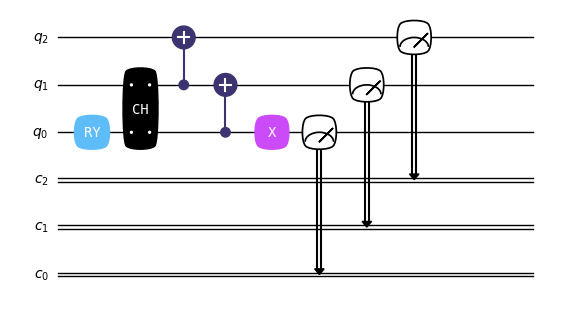

In [4]:
# Create a 3-qubit quantum circuit
qc = QubitCircuit(N=3, num_cbits=3)
# Initial state: all qubits in |0⟩ state
initial_state = tensor([basis(2, 0) for _ in range(qc.N)])
theta = 2 * np.arccos(1/np.sqrt(3))
# Apply an Ry gate with a rotation angle of theta on qubit 0
qc.add_gate("RY", 0, arg_value=theta)

def controlled_hadamard():
    hadamard = gates.hadamard_transform().full()
    mat = np.zeros((4, 4), dtype=np.complex128)
    mat[0, 0] = mat[1, 1] = 1.
    mat[2:4, 2:4] = hadamard
    return Qobj(mat, dims=[[2, 2], [2, 2]])

qc.user_gates = {"CH": controlled_hadamard}

# Add the controlled-Hadamard gate to the circuit
qc.add_gate("CH", targets=[0, 1])
qc.add_gate("CNOT", 2, 1)
qc.add_gate("CNOT", 1, 0)
# Add an X gate to the qubit
qc.add_gate("X", 0)

print(initial_state)
# Simulate the circuit
result = qc.run(state=initial_state)
# Get the final state
W_state = result
print("W State:", W_state)


# Add measurements to the circuit
qc.add_measurement("M", targets=[0], classical_store=0)
qc.add_measurement("M", targets=[1], classical_store=1)
qc.add_measurement("M", targets=[2], classical_store=2)

# Draw the circuit
fig, ax = plt.subplots(figsize=(6, 3))
qc.draw("matplotlib", ax=ax)
#fig.savefig('W_state_circuit.png', dpi=300, bbox_inches='tight')

Probabilities:
|000>: 0.0
|001>: 0.32
|010>: 0.332
|011>: 0.0
|100>: 0.348
|101>: 0.0
|110>: 0.0
|111>: 0.0
Measurement outcome probabilities:
|000>: 0.0000
|001>: 0.3200
|010>: 0.3320
|011>: 0.0000
|100>: 0.3480
|101>: 0.0000
|110>: 0.0000
|111>: 0.0000


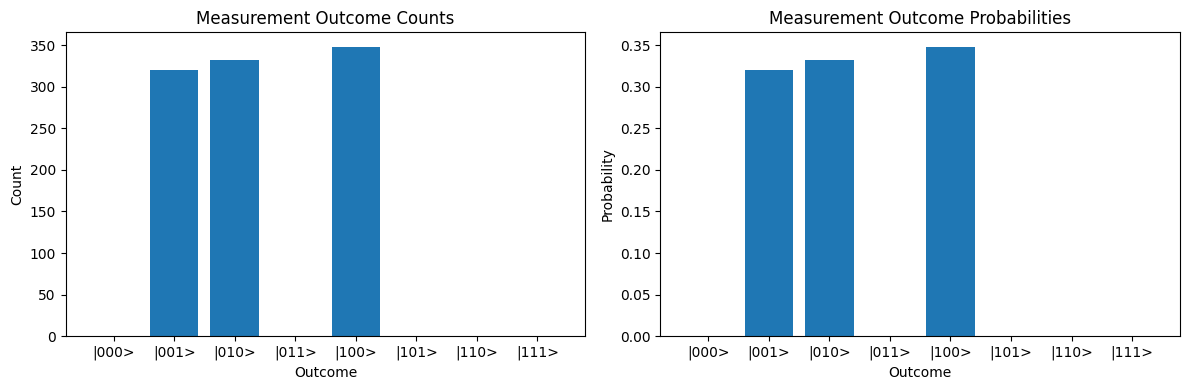

In [5]:
# Define the projection operators for the computational basis
PZ1 = [tensor(ket2dm(basis(2, 0)), identity(2), identity(2)), tensor(ket2dm(basis(2, 1)), identity(2), identity(2))]
PZ2 = [tensor(identity(2), ket2dm(basis(2, 0)), identity(2)), tensor(identity(2), ket2dm(basis(2, 1)), identity(2))]
PZ3 = [tensor(identity(2), identity(2), ket2dm(basis(2, 0))), tensor(identity(2), identity(2), ket2dm(basis(2, 1)))]

# Run the circuit multiple times and collect the measurement outcomes
num_runs = 1000
measurement_results = []

for _ in range(num_runs):
    # Run the circuit
    result = qc.run(initial_state)
    
    # Measure the first qubit
    measurement1, _ = measure(result, PZ1)
    
    # Measure the second qubit
    measurement2, _ = measure(result, PZ2)

    # Measure the third qubit
    measurement3, _ = measure(result, PZ3)
    
    # Combine the measurement outcomes
    outcome = f"|{measurement1}{measurement2}{measurement3}>"
    measurement_results.append(outcome)

# Count the occurrences of |000>, |001>, |010>, |011>, |100>, |101>, |110>, and |111> outcomes
outcome_counts = {'|000>': 0, '|001>': 0, '|010>': 0, '|011>': 0, '|100>': 0, '|101>': 0, '|110>': 0, '|111>': 0}
for outcome in measurement_results:
    outcome_counts[outcome] += 1

# Calculate the probabilities of each outcome
total_runs = len(measurement_results)
probabilities = {outcome: count / total_runs for outcome, count in outcome_counts.items()}

# Print the probabilities
print("Probabilities:")
for outcome, probability in probabilities.items():
    print(f"{outcome}: {probability}")

# Print the probabilities
print("Measurement outcome probabilities:")
for outcome, probability in probabilities.items():
    print(f"{outcome}: {probability:.4f}")

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the count histogram
ax1.bar(outcome_counts.keys(), outcome_counts.values())
ax1.set_xlabel('Outcome')
ax1.set_ylabel('Count')
ax1.set_title('Measurement Outcome Counts')

# Plot the probability histogram
ax2.bar(outcome_counts.keys(), probabilities.values())
ax2.set_xlabel('Outcome')
ax2.set_ylabel('Probability')
ax2.set_title('Measurement Outcome Probabilities')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure as PNG
#plt.savefig('W_state_histograms.png', dpi=300)

# Display the plot
plt.show()

<font face="Arial" size="4" color="black">

These probabilities are consistent with the theoretical probabilities of 1/3 for the |001⟩, |010⟩, and |100⟩ outcomes, and 0 for all other outcomes. The rest of probabilities are: P(|000⟩) = P(|011⟩) = P(|101⟩) = P(|110⟩) = P(|111⟩) = 0.
This means that the measurement outcome probabilities indicate that when measuring the W state, you will always observe one and only one qubit in the state |1⟩, while the other two qubits are in the state |0⟩. The probabilities of each possible outcome are approximately equal, around 1/3, for the |001⟩, |010⟩, and |100⟩ states. The state is symmetric with respect to the qubits, meaning that each qubit has an equal probability of being found in the state |1⟩. The GHZ state has only two possible measurement outcomes (|000⟩ and |111⟩), while the W state has three possible outcomes (|001⟩, |010⟩, and |100⟩). The GHZ state exhibits strong correlations between the qubits, where measuring one qubit determines the state of the other qubits.

In contrast, the W state has a more distributed entanglement, where each qubit has an equal probability of being found in the state |1⟩. The GHZ state is more sensitive to loss, as measuring one qubit in the |0⟩ or |1⟩ state determines the state of the other qubits. The W state is more robust against loss, as measuring one qubit in the |0⟩ state still leaves the other two qubits entangled.

In the reference [1], the authors discuss new methods for creating GHZ and W-entangled states on quantum computers. This is important because creating these states efficiently can significantly enhance the performance of quantum computing systems.
>The algorithm uses two building blocks to construct the W-entangled state: the B(p), which is a controlled-G(p) rotation followed by an inverted CNOT.

The building block B(p) with parameter 0 < p < 1 has the rotation matrix G(p) equal to:

<div align="center">
    <img src="images/Gp.png">
</div>

For p = 1/2, this is the transposed Hadamard gate. Therefore,

<div align="center">
    <img src="images/Bp.png">
</div>

The rotation gate of angle θ around the Y-axis Ry(θ) is given by:

<div align="center">
    <img src="images/U3.png">
</div>

The angle θ is related to p through cos(θ/2) = √ p and sin(θ/2) = √1-p. We implement this rotation in a controlled way using only U₃(θ, 0, 0) and CNOT. You can also look into the reference [6] for different gates, such as U₃. OpenQASM (Open Quantum Assembly Language) is a programming language specifically designed for describing quantum circuits. OpenQASM defines the syntax and structure for representing quantum registers, quantum gates, and measurements. It is a standard language that can be used to express quantum circuits across different quantum computing platforms and frameworks. Qiskit uses OpenQASM as the underlying language for representing quantum circuits. When you create a quantum circuit using Qiskit's Python API, it internally generates an OpenQASM representation of the circuit. Qiskit provides additional features and abstractions on top of OpenQASM, such as circuit composition, parameterized circuits, and integration with IBM's quantum hardware and simulators. QuTiP has its own way of representing quantum circuits using the QubitCircuit class.

>How to scale the W and GHZ states

The purpose of the code in the paper [1] is to generate a quantum circuit that prepares a W state with a specified number of qubits. The W state is a multipartite entangled state where one and only one qubit is in the |1⟩ state, while the others are in the |0⟩ state. The code uses a recursive approach to construct the circuit based on the number of qubits. See also [2] code written in Qiskit. I will redo the code in QuTip.
Recursion is a programming technique where a function calls itself to solve a problem by breaking it down into smaller subproblems. In the case of the _w_state_circuit function, it recursively calls itself to construct the circuit for different subsets of qubits.
The user_gate1 function defines a custom-controlled rotation gate (CTRLRY) used in the circuit. It takes an argument arg_value representing the rotation angle.


[1] Efficient quantum algorithms for GHZ and W states, and implementation on the IBM quantum computer, Diogo Cruz et al., https://arxiv.org/pdf/1807.05572

[2] How to implement a circuit preparing the three-qubit W state?, https://quantumcomputing.stackexchange.com/questions/15506/how-to-implement-a-circuit-preparing-the-three-qubit-w-state


</font>

In [6]:
def user_gate1(arg_value):
     # controlled rotation X
     mat = np.zeros((4, 4), dtype=np.complex128)
     mat[0, 0] = mat[1, 1] = 1.
     mat[2:4, 2:4] = gates.ry(arg_value).full()
     return Qobj(mat, dims=[[2, 2], [2, 2]])

<font face="Arial" size="4" color="black">

The _w_state_circuit  function is a recursive function that generates the quantum circuit for  preparing the W state. It takes the following parameters:qc: the quantum circuit object; nn and mm: integers representing the current state of the recursion; qubitC: the control qubit index.  Inside the _w_state_circuit function: if nn is 0 and mm is 1, no action is taken; if nn is 1 and mm is 2, it applies a controlled rotation gate (CTRLRY) with an angle of π/2, followed by a CNOT gate. The target qubit index (qubitT) is incremented. For other cases, it calculates the rotation angle theta based on nn and mm, applies the controlled rotation gate and CNOT gate, and updates qubitT. It then recursively calls _w_state_circuit for the upper and lower child states based on the values of nn and mm. In the context of this code, the term "child state" refers to the subsets of 
qubits that are handled in each recursive call of the _w_state_circuit function.

When the _w_state_circuit  function is called recursively, it divides the current subset of qubits  into two smaller subsets, which are referred to as the "upper child"  and "lower child" states [1]. 

The upper child state represents the first half of the qubits in the current subset, while the lower child state represents the second half of the qubits.
For example, let's say we have a total of 4 qubits (q0, q1, q2, q3). In the first recursive call to _w_state_circuit, the entire set of qubits is considered. The function then divides this set into two child states:
- Upper child state: (q0, q1)
- Lower child state: (q2, q3)

The function then recursively calls itself for each child state. In the next level of recursion:
- For the upper child state (q0, q1): upper child state (q0) and lower child state (q1);
 For the lower child state (q2, q3): upper child state (q2) and lower child state (q3);

This recursive division continues until the base cases are reached, which are when nn is 0 and mm is 1, or when nn is 1 and mm is 2. By recursively handling these child states, the _w_state_circuit function constructs the quantum circuit for the W state by applying the necessary gates to each subset of qubits.
</font>

In [7]:
def _w_state_circuit(qc, nn, mm, qubitC):
    global qubitT  # reference to global variable qubitT

    if nn == 0 and mm == 1:
        pass  # do nothing in this case
    elif nn == 1 and mm == 2:  # case (1,2)
        theta = np.pi / 2
        qc.add_gate("CTRLRY", targets=[qubitC, qubitT], arg_value=theta)
        qc.add_gate("CNOT", controls=[qubitT], targets=[qubitC])
        #qc.add_gate("CNOT", qubitT, qubitC)
        qubitT = qubitT + 1
    else:  # otherwise
        theta = 2 * np.arccos(np.sqrt(nn / mm))
        qc.add_gate("CTRLRY", targets=[qubitC, qubitT], arg_value=theta)
        qc.add_gate("CNOT", controls=[qubitT], targets=[qubitC])
        #qc.add_gate("CNOT", qubitT, qubitC)

        qubitTRecurse = qubitT  # saving target qubit index, used as control qubit for lower child
        qubitT = qubitT + 1

        a = np.floor(nn / 2)
        b = np.floor(mm / 2)
        c = np.ceil(nn / 2)
        d = np.ceil(mm / 2)

        if a == 1 and b == 1:  # upper child (1,1) => (1,2) became upper child
            _w_state_circuit(qc, 1, 2, qubitC)
            # there is no lower child
        elif c == 1 and d == 1:  # lower child (1,1) => (1,2) became lower child
            _w_state_circuit(qc, 1, 2, qubitTRecurse)
            # there is no upper child
        else:
            # upper child
            _w_state_circuit(qc, a, b, qubitC)
            # lower child
            _w_state_circuit(qc, c, d, qubitTRecurse)


<font face="Arial" size="4" color="black">


The w_state_circuit function is the main function that  generates the quantum circuit for the W state. It takes the number of  qubits as input and initializes the necessary variables. It calls the _w_state_circuit function to generate the circuit and adds measurements to each qubit.

</font>

In [8]:
def w_state_circuit(qubits):
    global qubitT
    qubitT = 1
    qc = QubitCircuit(N=qubits, num_cbits=qubits)
    qc.user_gates = {"CTRLRY": user_gate1}  # Add this line to define the custom gate
    qc.add_gate("X", targets=[0])
    _w_state_circuit(qc, np.floor(qubits / 2), qubits, 0)
    # Add measurements to the circuit
    for i in range(qubits):
        qc.add_measurement("M", targets=[i], classical_store=i)
    return qc

<font face="Arial" size="4" color="black">
    
The generate_projection_operators function generates the projection operators for measuring each qubit in the computational basis. The measure_all_qubits  function measures all qubits in the given state using the projection  operators and returns the measurement outcomes as a string.

</font>

In [9]:
def generate_projection_operators(qubits):
    PZ = []
    for i in range(qubits):
        PZi = []
        for j in range(2):
            op_list = [identity(2)] * qubits
            op_list[i] = ket2dm(basis(2, j))
            PZi.append(tensor(op_list))
        PZ.append(PZi)
    return PZ

def measure_all_qubits(state, PZ):
    measurement_outcomes = []
    for PZi in PZ:
        measurement, _ = measure(state, PZi)
        measurement_outcomes.append(str(measurement))
    return ''.join(measurement_outcomes)

<font face="Arial" size="4" color="black">
    
The code then sets the number of qubits to 3 and initializes the qubitT variable to 1. It calls the w_state_circuit function to generate the quantum circuit for the W state with 3 qubits. The initial state is prepared as the tensor product of three qubits in the |0⟩ state. The circuit is run using the run method, and the resulting W state is obtained. Finally, the code draws the quantum circuit using matplotlib.
</font>

Quantum object: dims=[[2, 2, 2], [1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W State: Quantum object: dims=[[2, 2, 2], [1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


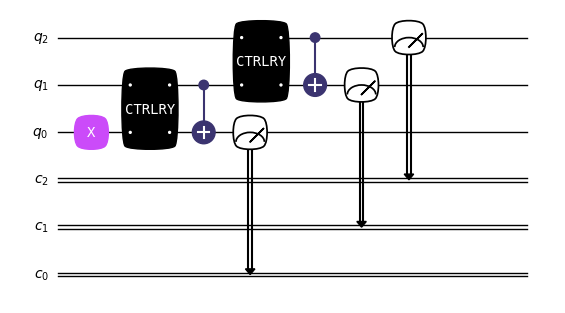

In [10]:
#number of qubits
qubits=3

# Initialize qubitT
qubitT = 1 # which represents the target qubit index.


# Call the w_state_circuit function with parameters for a W3 state
qc = w_state_circuit(qubits)

# Initialize the initial state
initial_state = tensor([basis(2, 0) for _ in range(qubits)])
print(initial_state)

# Run the circuit
result = qc.run(state=initial_state)

# Get the final state
W_state = result
print("W State:", W_state)

# Draw the circuit
fig, ax = plt.subplots(figsize=(6, 3))
qc.draw("matplotlib", ax=ax)
#fig.savefig('W_state_circuit_recursive_algorithm_qub5.png', dpi=300, bbox_inches='tight')

<font face="Arial" size="4" color="black">
    

The amplitude of each component in the W state is 1/√3, and the probability is the square of the amplitude:
(1/√3)² = 1/3
Therefore, in the ideal case, each outcome (|100⟩, |010⟩, and |001⟩) should have a probability of 1/3.

</font>

Probabilities:
|001>: 0.337
|100>: 0.339
|010>: 0.324
Measurement outcome probabilities:
|001>: 0.3370
|100>: 0.3390
|010>: 0.3240


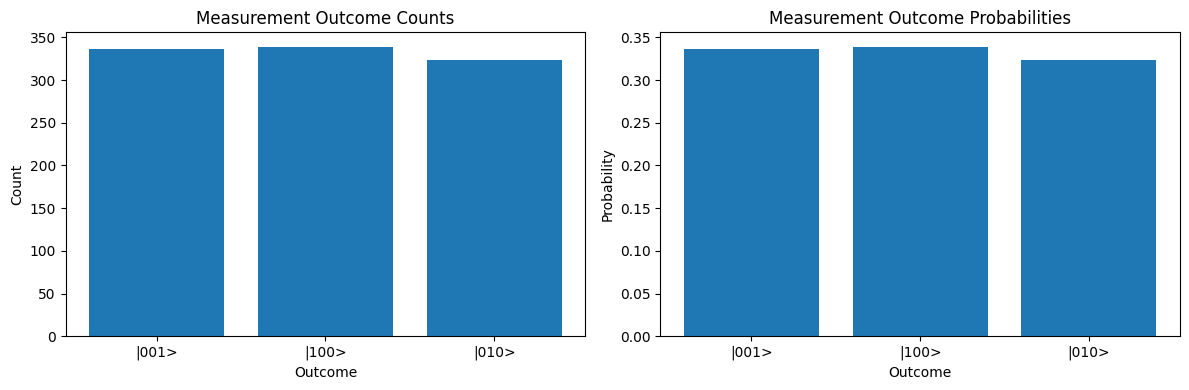

In [11]:
# Generate the projection operators for the computational basis
PZ = generate_projection_operators(qubits)

# Run the circuit multiple times and collect the measurement outcomes
num_runs = 1000
measurement_results = []

for _ in range(num_runs):
    # Run the circuit
    result = qc.run(initial_state)
    
    # Measure all qubits
    outcome = measure_all_qubits(result, PZ)
    
    # Combine the measurement outcomes
    measurement_results.append(f"|{outcome}>")

# Count the occurrences of each outcome
outcome_counts = {}
for outcome in measurement_results:
    if outcome not in outcome_counts:
        outcome_counts[outcome] = 0
    outcome_counts[outcome] += 1

# Calculate the probabilities of each outcome
total_runs = len(measurement_results)
probabilities = {outcome: count / total_runs for outcome, count in outcome_counts.items()}

# Print the probabilities
print("Probabilities:")
for outcome, probability in probabilities.items():
    print(f"{outcome}: {probability}")

# Print the probabilities
print("Measurement outcome probabilities:")
for outcome, probability in probabilities.items():
    print(f"{outcome}: {probability:.4f}")

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the count histogram
ax1.bar(outcome_counts.keys(), outcome_counts.values())
ax1.set_xlabel('Outcome')
ax1.set_ylabel('Count')
ax1.set_title('Measurement Outcome Counts')

# Plot the probability histogram
ax2.bar(outcome_counts.keys(), probabilities.values())
ax2.set_xlabel('Outcome')
ax2.set_ylabel('Probability')
ax2.set_title('Measurement Outcome Probabilities')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure as PNG
#plt.savefig('W_state_histograms.png', dpi=300)
# Save the figure as PNG
#plt.savefig('W_state_histograms_recursive_algorithm_qub5.png', dpi=300)

# Display the plot
plt.show()

<font face="Arial" size="4" color="black">
    
Let's try to create a 5-qubit W state. The outcome measured probabilities for five-qubit W state |W⟩ = (|10000⟩ + |01000⟩ + |00100⟩ + |00010⟩ + |00001⟩) / √5 will be:

</font>

Quantum object: dims=[[2, 2, 2, 2, 2], [1]], shape=(32, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W State: Quantum object: dims=[[2, 2, 2, 2, 2], [1]], shape=(32, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


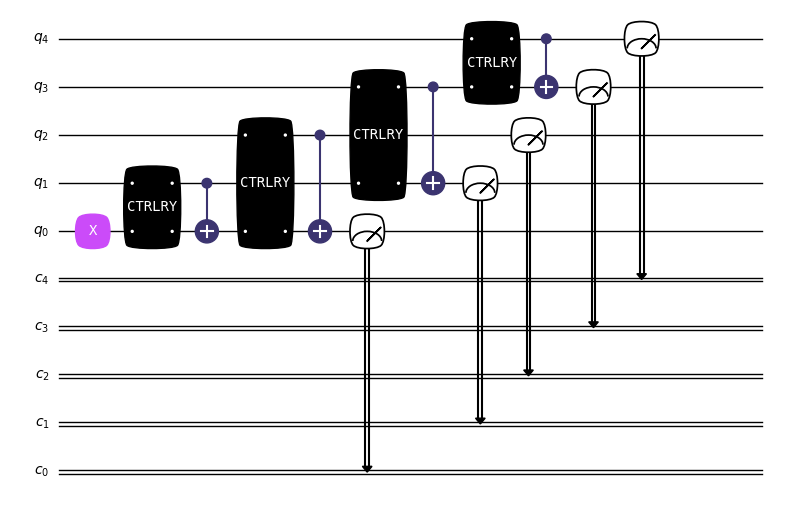

In [12]:
#number of qubits
qubits=5

# Initialize qubitT
qubitT = 1 # which represents the target qubit index.


# Call the w_state_circuit function with parameters for a W3 state
qc = w_state_circuit(qubits)

# Initialize the initial state
initial_state = tensor([basis(2, 0) for _ in range(qubits)])
print(initial_state)

# Run the circuit
result = qc.run(state=initial_state)

# Get the final state
W_state = result
print("W State:", W_state)

# Draw the circuit
fig, ax = plt.subplots(figsize=(6, 3))
qc.draw("matplotlib", ax=ax)
#fig.savefig('W_state_circuit_recursive_algorithm_qub5.png', dpi=300, bbox_inches='tight')

Probabilities:
|10000>: 0.221
|01000>: 0.194
|00010>: 0.193
|00100>: 0.195
|00001>: 0.197
Measurement outcome probabilities:
|10000>: 0.2210
|01000>: 0.1940
|00010>: 0.1930
|00100>: 0.1950
|00001>: 0.1970


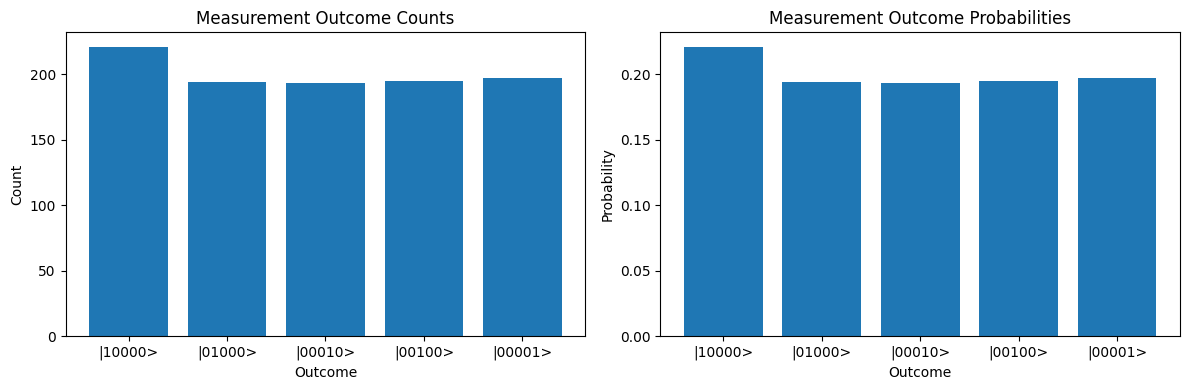

In [13]:
# Generate the projection operators for the computational basis
PZ = generate_projection_operators(qubits)

# Run the circuit multiple times and collect the measurement outcomes
num_runs = 1000
measurement_results = []

for _ in range(num_runs):
    # Run the circuit
    result = qc.run(initial_state)
    
    # Measure all qubits
    outcome = measure_all_qubits(result, PZ)
    
    # Combine the measurement outcomes
    measurement_results.append(f"|{outcome}>")

# Count the occurrences of each outcome
outcome_counts = {}
for outcome in measurement_results:
    if outcome not in outcome_counts:
        outcome_counts[outcome] = 0
    outcome_counts[outcome] += 1

# Calculate the probabilities of each outcome
total_runs = len(measurement_results)
probabilities = {outcome: count / total_runs for outcome, count in outcome_counts.items()}

# Print the probabilities
print("Probabilities:")
for outcome, probability in probabilities.items():
    print(f"{outcome}: {probability}")

# Print the probabilities
print("Measurement outcome probabilities:")
for outcome, probability in probabilities.items():
    print(f"{outcome}: {probability:.4f}")

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the count histogram
ax1.bar(outcome_counts.keys(), outcome_counts.values())
ax1.set_xlabel('Outcome')
ax1.set_ylabel('Count')
ax1.set_title('Measurement Outcome Counts')

# Plot the probability histogram
ax2.bar(outcome_counts.keys(), probabilities.values())
ax2.set_xlabel('Outcome')
ax2.set_ylabel('Probability')
ax2.set_title('Measurement Outcome Probabilities')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure as PNG
#plt.savefig('W_state_histograms.png', dpi=300)
# Save the figure as PNG
#plt.savefig('W_state_histograms_recursive_algorithm_qub5.png', dpi=300)

# Display the plot
plt.show()


<font face="Arial" size="4" color="black">
    
These probabilities are close to the ideal probability of 0.2, with some small deviations due to the statistical nature of the measurement process. The slight variations in the probabilities are expected when running the circuit a finite number of times (in our case, 1000 runs).

In the provided code, the measurement is performed in the Pauli Z basis, which is also known as the computational basis. 
The generate_projection_operators  function generates the projection operators for measuring each qubit in  the computational basis. The projection operators are created using the  ket2dm(basis(2, j)) function, where j takes values 0 and 1, corresponding to the |0⟩ and |1⟩ states, respectively. When the measure_all_qubits  function is called, it uses these projection operators to measure each  qubit in the Pauli Z basis. The measurement outcomes are then combined  to form the final state in the computational basis.

> Measuring in the Pauli Z basis means that each qubit is projected onto either the |0⟩ or |1⟩ state, and the measurement outcomes correspond to these basis states. This is the most common basis for measuring qubits in quantum computing. Measuring in the Pauli X basis means projecting the qubit state onto the eigenstates of the Pauli X operator, which are |+⟩ = (|0⟩ + |1⟩) / √2 and |-⟩ = (|0⟩ - |1⟩) / √2. This basis is useful in scenarios such as the Deutsch algorithm and certain error correction schemes. Measuring in the Pauli Y basis involves projecting the qubit state onto the eigenstates of the Pauli Y operator, which are |i⟩ = (|0⟩ + i|1⟩) / √2 and |-i⟩ = (|0⟩ - i|1⟩) / √2. This basis is less commonly used but can be relevant in specific quantum algorithms or protocols. In some cases, you may need to measure in an arbitrary basis, which can be defined by a set of orthogonal states. This is often required in quantum state tomography, where you need to estimate the state of a quantum system by performing measurements in multiple bases.


For generating a GHZ state, you don't need a recursive algorithm like the one used for the W state. The circuit for creating a GHZ state is much simpler and can be implemented directly, as shown in the code:


</font>

In [14]:
def ghz_state_circuit(qubits):
    qc = QubitCircuit(N=qubits, num_cbits=qubits)
    qc.add_gate("H", targets=[0])
    for i in range(1, qubits):
        qc.add_gate("CNOT", targets=[i], controls=[i-1])
    for i in range(qubits):
        qc.add_measurement("M", targets=[i], classical_store=i)
    return qc

<font face="Arial" size="4" color="black">

The circuit for creating a GHZ state consists of the following steps:
Apply a Hadamard gate (H) to the first qubit, which creates a superposition of |0⟩ and |1⟩ states.
Apply a series of CNOT gates, with each subsequent qubit as the target and the previous qubit as the control. This entangles all the qubits.
Add measurements to each qubit to obtain the final state.

The implementation of the ghz_state_circuit function creates a quantum circuit with the specified number of qubits. It applies a Hadamard gate to the first qubit using qc.add_gate("H", targets=[0]). It iterates over the remaining qubits (from index 1 to qubits-1) and applies a CNOT gate to each qubit, with the previous qubit as the control, using qc.add_gate("CNOT", targets=[i], controls=[i-1]). It adds measurements to each qubit using qc.add_measurement("M", targets=[i], classical_store=i). 
The resulting state will be an equal superposition of |00…0⟩ and |11…1⟩, where all qubits are either in the |0⟩ state or the |1⟩ state.

</font>

Quantum object: dims=[[2, 2, 2, 2, 2], [1]], shape=(32, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
GHZ State: Quantum object: dims=[[2, 2, 2, 2, 2], [1]], shape=(32, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


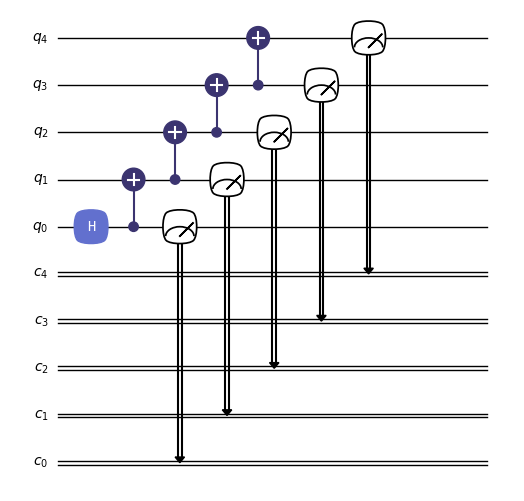

In [15]:
# Create the GHZ state circuit
qc = ghz_state_circuit(qubits)

# Initialize the initial state
initial_state = tensor([basis(2, 0) for _ in range(qubits)])
print(initial_state)

# Run the circuit
result = qc.run(state=initial_state)

# Get the final state
GHZ_state = result
print("GHZ State:", GHZ_state)

# Draw the circuit
fig, ax = plt.subplots(figsize=(6, 3))
qc.draw("matplotlib", ax=ax)
#fig.savefig('GHZ_state_circuit_qub5.png', dpi=300, bbox_inches='tight')


<font face="Arial" size="4" color="black">

The non-zero amplitudes are 0.70710678 (which is approximately 1/√2) at indices 0 and 31, corresponding to the basis states |00000⟩ and |11111⟩, respectively. The probabilities of measuring each outcome in the ideal 5-qubit GHZ state are:

</font>

Probabilities:
|11111>: 0.472
|00000>: 0.528
Measurement outcome probabilities:
|11111>: 0.4720
|00000>: 0.5280


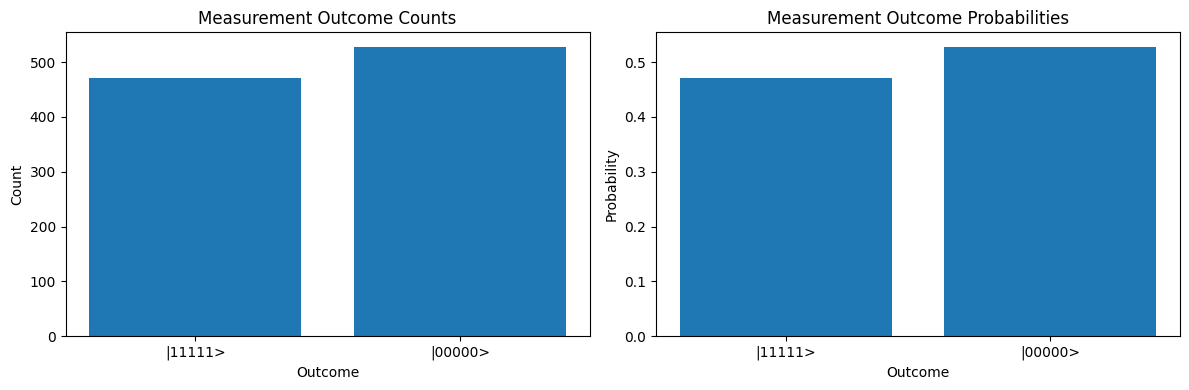

In [16]:
# Generate the projection operators for the computational basis
PZ = generate_projection_operators(qubits)

# Run the circuit multiple times and collect the measurement outcomes
num_runs = 1000
measurement_results = []

for _ in range(num_runs):
    # Run the circuit
    result = qc.run(initial_state)
    
    # Measure all qubits
    outcome = measure_all_qubits(result, PZ)
    
    # Combine the measurement outcomes
    measurement_results.append(f"|{outcome}>")

# Count the occurrences of each outcome
outcome_counts = {}
for outcome in measurement_results:
    if outcome not in outcome_counts:
        outcome_counts[outcome] = 0
    outcome_counts[outcome] += 1

# Calculate the probabilities of each outcome
total_runs = len(measurement_results)
probabilities = {outcome: count / total_runs for outcome, count in outcome_counts.items()}

# Print the probabilities
print("Probabilities:")
for outcome, probability in probabilities.items():
    print(f"{outcome}: {probability}")
# Print the probabilities
print("Measurement outcome probabilities:")
for outcome, probability in probabilities.items():
    print(f"{outcome}: {probability:.4f}")

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the count histogram
ax1.bar(outcome_counts.keys(), outcome_counts.values())
ax1.set_xlabel('Outcome')
ax1.set_ylabel('Count')
ax1.set_title('Measurement Outcome Counts')

# Plot the probability histogram
ax2.bar(outcome_counts.keys(), probabilities.values())
ax2.set_xlabel('Outcome')
ax2.set_ylabel('Probability')
ax2.set_title('Measurement Outcome Probabilities')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure as PNG
#plt.savefig('W_state_histograms.png', dpi=300)
# Save the figure as PNG
#plt.savefig('GHZ_state_histograms_qub5.png', dpi=300)

# Display the plot
plt.show()

<font face="Arial" size="4" color="black">

Each outcome has an equal probability of 1/2, as there are only two possible outcomes in the 5-qubit GHZ state.

# Conclusion

Both GHZ and W-states have been experimentally realized in various physical systems, such as trapped ions [3] [4], photons [5], [6], and superconducting qubits [7], [8]. These experimental demonstrations not only confirm the predictions of quantum mechanics but also pave the way for practical applications in quantum technologies.
Preparing multipartite entangled states is one problem, but measuring and proving that you have the entangled states is a totally different task. Once you have prepared an entangled state, you need to perform measurements and apply appropriate techniques to verify and quantify the entanglement present in the system. This step is crucial for ensuring the reliability and usefulness of the prepared states in quantum information processing tasks.

Measuring entanglement involves performing measurements on the individual qubits or subsets of qubits and analyzing the correlations between the measurement outcomes. Proving entanglement often requires using entanglement witnesses, Bell inequalities, or other entanglement criteria to demonstrate that the state is indeed entangled and cannot be described by a separable state. Quantum state tomography can be used to reconstruct the density matrix of the system, which can then be analyzed to determine the presence and degree of entanglement. The specific methods used for measuring and proving entanglement depend on the type of entanglement, the size of the system, and the available resources (e.g., measurement capabilities, ancilla qubits, etc.).

As research in quantum information processing continues to advance, the development of efficient and reliable techniques for measuring and proving entanglement will play a vital role in harnessing the power of multipartite entangled states for practical applications in quantum technologies.

[3] Experimental entanglement of four particles by C. A. Sackett et al. (2000), https://www.rle.mit.edu/cua_pub/8.422/Reading%20Material/QC-sackett-wineland-et-al-experimental-entanglement-of-four-particles-nature-v404-p256-16mar00.pdf

[4] Scalable multiparticle entanglement of trapped ions by H. Häffner et al. (2005), https://arxiv.org/pdf/quant-ph/0603217

[5] Experimental demonstration of five-photon entanglement and open-destination teleportation by Z. Zhao et al. (2004), https://arxiv.org/pdf/quant-ph/0402096

[6] Experimental realization of a three-qubit entangled W-state by M. Eibl et al. (2004), https://www.researchgate.net/publication/6628945_Experimental_Realization_of_a_Three-Qubit_Entangled_W_State

[7] Preparation and measurement of three-qubit entanglement in a superconducting circuit by L. DiCarlo et al. (2010), https://www.researchgate.net/publication/46821151_Preparation_and_Measurement_of_Three-Qubit_Entanglement_in_a_Superconducting_Circuit

[8] Generation of three-qubit entangled states using superconducting phase qubits by M. Neeley et al. (2010), https://arxiv.org/abs/1004.4246

</font>

In [17]:
from qutip.ipynbtools import version_table

version_table()